<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Series de tiempo</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>Foto de Diego discutiendo con chatgpt.</small>
</p>

In [5]:
#pip install yfinance

In [9]:
import pandas as pd
import yfinance as yf
import warnings

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
warnings.filterwarnings("ignore")

In [6]:
# Define the ticker symbol for S&P 500
symbol = "^GSPC"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Display the first few rows of the data
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,0.005868
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,-0.004050
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,-0.012021


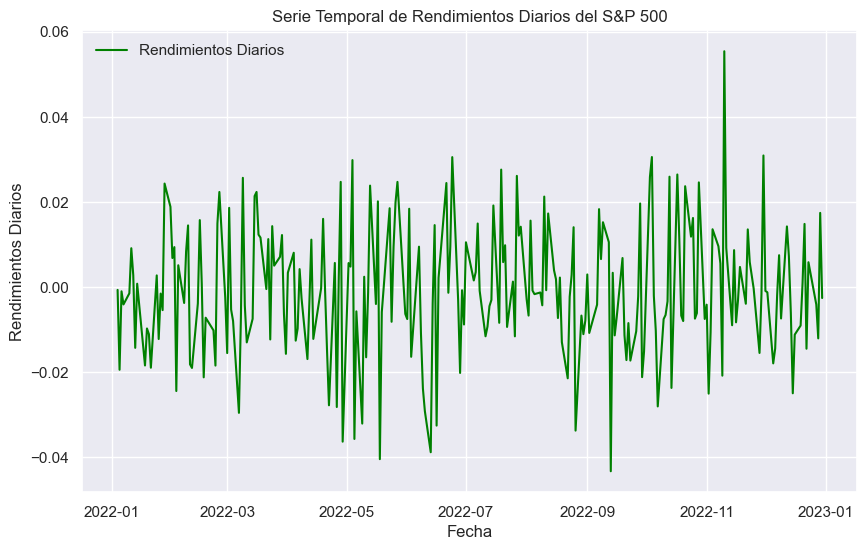

In [4]:
# Set the seaborn style to match the presentation aesthetic
sns.set(style="darkgrid")

# Plot the time series with green color
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], color='green', label='Rendimientos Diarios')
plt.title('Serie Temporal de Rendimientos Diarios del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos Diarios')
plt.legend()
plt.show()

c:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


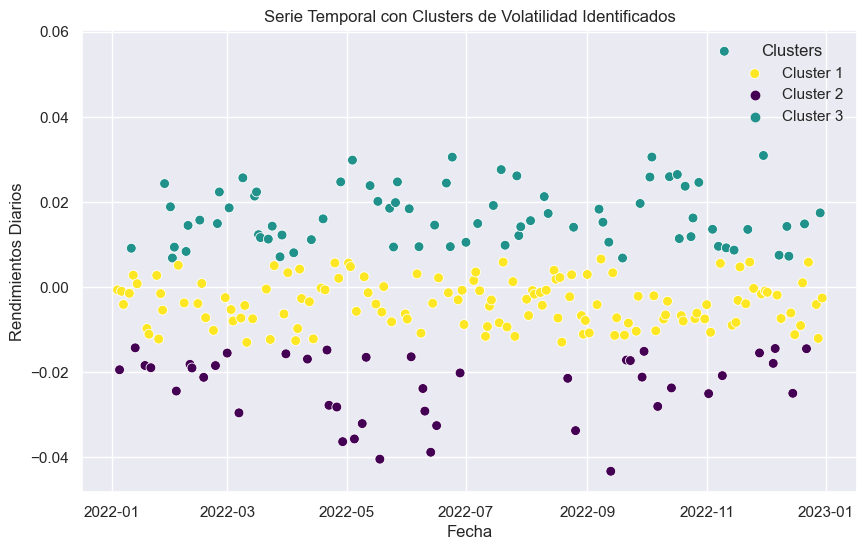

In [8]:
# Drop missing values
data = data.dropna()

# Use K-means clustering to identify volatility clusters
returns_array = data['Returns'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(returns_array)

# Plot the time series with clusters highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.index, y='Returns', hue='Cluster', palette='viridis', s=50)
plt.title('Serie Temporal con Clusters de Volatilidad Identificados')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos Diarios')
plt.legend(title='Clusters', loc='upper right', labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()